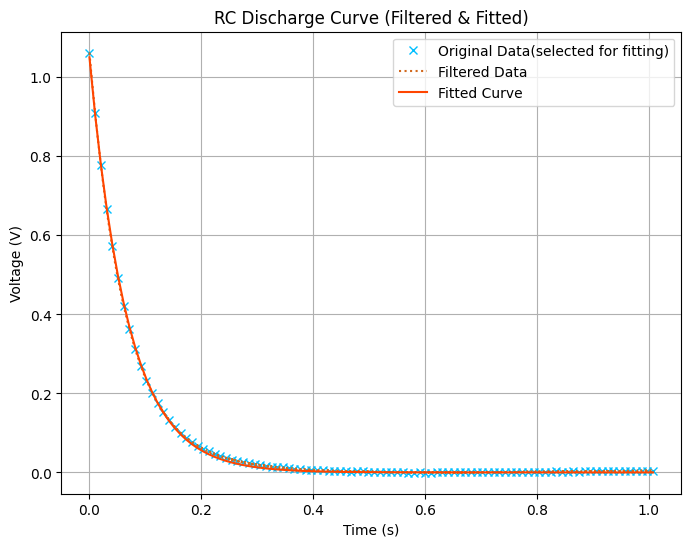

Fitted Parameters: a = 1.051, b = 14.662
Time Constant (tau) = 0.068 ms,theory=0.06ms


In [98]:
#C=1uF,R=10ohm,R_gen=50ohm
#U = U_C
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

# 读取CSV文件
data = pd.read_csv('RC_release1.csv')  
data = data[data['in s'] > 0]
# 提取时间和电压数据
time = 1000*data['in s'].values
voltage = data['C1 in V'].values

# 使用Savitzky-Golay滤波器平滑数据
filtered_voltage = savgol_filter(voltage, window_length=51, polyorder=3)



# 定义指数衰减函数
def exp_decay(t, a, b):
    return a * np.exp(-b * t)

# 选取部分数据进行拟合
time_list=np.linspace(0, len(time)-1, num = 100,dtype=int)
fit_time = time[time_list]
fit_voltage = filtered_voltage[time_list]

# 拟合数据
popt, pcov = curve_fit(exp_decay, fit_time, fit_voltage)
a, b = popt
tau=1/b
# 绘制滤波后的数据图
plt.figure(figsize=(8, 6))
plt.plot(time[time_list], voltage[time_list], 'x',color = 'deepskyblue', label='Original Data(selected for fitting)')
plt.plot(time, filtered_voltage, ':',color = 'chocolate' , label='Filtered Data')
plt.plot(fit_time, exp_decay(fit_time, a, b), '-',color = 'orangered', label='Fitted Curve')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.title('RC Discharge Curve (Filtered & Fitted)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted Parameters: a = {a:.3f}, b = {b:.3f}")
print(f"Time Constant (tau) = {(tau):.3f} ms,theory=0.06ms")




Natural Frequency (f0) = 4.958 kHz
Quality Factor (Q) = 4.145


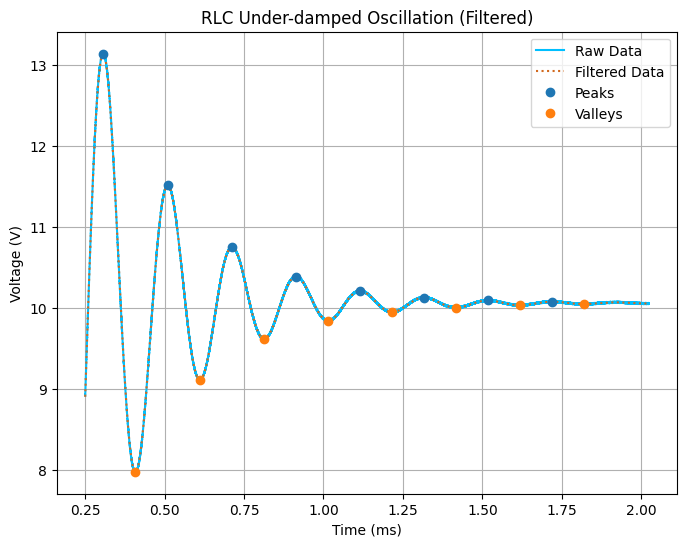

In [86]:
#C=0.1uf,L=10mH,R_gen=50ohm,R=1ohm
#U = U_C
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter, find_peaks

# 读取CSV文件
data = pd.read_csv('RLC.csv')  
data = data[data['in s'] > 0.00025]
# 提取时间和电压数据
time =1000 * data['in s'].values
voltage = data['C1 in V'].values

# 使用Savitzky-Golay滤波器平滑数据
filtered_voltage = savgol_filter(voltage, window_length=3000, polyorder=3)

# 找到滤波后数据的峰值和谷值
n=8
peaks, _ = find_peaks(filtered_voltage,height=voltage[-1],distance = 1000)
valleys, _ = find_peaks(-filtered_voltage,height=-voltage[-1],distance = 1000)
peaks = peaks[0:n]
valleys = valleys[0:n]

# 计算相邻峰值之间的时间差
peak_times = time[peaks]
periods = np.diff(peak_times)
avg_period = np.mean(periods)

# 计算固有频率
f0 = 1 / avg_period

# 计算相邻峰-谷值的幅度差
peak_values = filtered_voltage[peaks]
valley_values = filtered_voltage[valleys]
amplitudes = peak_values[:len(valley_values)] - valley_values

# 拟合幅度差的指数衰减
def exp_decay(x, a, alpha):
    return a * np.exp(-alpha * x)

xdata = np.arange(len(amplitudes))
popt, pcov = curve_fit(exp_decay, xdata, amplitudes)
a, alpha = popt

# 计算品质因数
Q = np.pi / alpha

print(f"Natural Frequency (f0) = {f0:.3f} kHz")
print(f"Quality Factor (Q) = {Q:.3f}")

# 绘制滤波后的数据图
plt.figure(figsize=(8, 6))
plt.plot(time, voltage, '-', label='Raw Data',color = 'deepskyblue')
plt.plot(time, filtered_voltage, ':',color = 'chocolate' , label='Filtered Data')
plt.plot(time[peaks], filtered_voltage[peaks], "o",label='Peaks')
plt.plot(time[valleys], filtered_voltage[valleys], "o",label='Valleys')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage (V)')
plt.title('RLC Under-damped Oscillation (Filtered)')
plt.legend()
plt.grid(True)
plt.show()





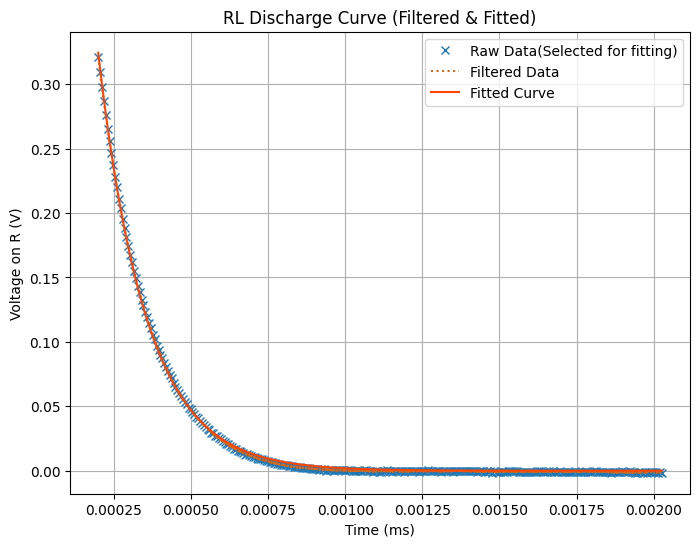

Fitted Parameters: a = 1.174, b = 6428.450
Time Constant (tau) =  68.20472607724433  ms


In [99]:
#R=10ohm,L=10mH,R_L=13.8ohm,R_gen=50ohm
#U = U_R

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from scipy.optimize import curve_fit

# 读取CSV文件
data = pd.read_csv('RL1.csv')  
data = data[data['in s'] > 0.0002]
# 提取时间和电压数据
time = data['in s'].values
voltage = data['C1 in V'].values

# 使用Savitzky-Golay滤波器平滑数据
filtered_voltage = savgol_filter(voltage, window_length=51, polyorder=3)

# 定义指数衰减函数
def exp_decay(t, a, b):
    return a * np.exp(-b * t)

# 选取部分数据进行拟合
list=np.linspace(0, len(time)-1, 300, dtype=int)
fit_time = time[list]
fit_voltage = filtered_voltage[list]

# 拟合数据
popt, pcov = curve_fit(exp_decay, fit_time, fit_voltage)
a, b = popt


# 绘制拟合曲线
plt.figure(figsize=(8, 6))
plt.plot(time[list], voltage[list], 'x', label='Raw Data(Selected for fitting)')
plt.plot(time, filtered_voltage, ':',color = 'chocolate' , label='Filtered Data')
plt.plot(fit_time, exp_decay(fit_time, a, b), '-',color = 'orangered', label='Fitted Curve')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage on R (V)')
plt.title('RL Discharge Curve (Filtered & Fitted)')
plt.legend()
plt.grid(True)
plt.show()

print(f"Fitted Parameters: a = {a:.3f}, b = {b:.3f}")
print(f"Time Constant (tau) = ",1000*tau," ms")


